In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from tqdm import tqdm
import random

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
data = pd.read_csv('bolha_flats_all_info1-49_14-03-2021_20-55-58.csv')

In [3]:
data= data.drop('Unnamed: 0', axis = 1)

In [4]:
data.head()

,Šifra oglasa,Objavljen,Do poteka še,Število prikazov oglasa,Cena,Vrsta cene,Posredovanje,Lokacija,Umeščenost stanovanja,Nadstropje,...,Neto površina,Leto izgradnje*,Leto zadnje prenove,Opremljenost in stanje,Energetski razred,Možnost menjave,Število parkirnih mest,Balkon / terasa / atrij,Zunanje površine in oprema,Interna številka oglasa
0,6523968,14.03.2021dne18:49,"\n29dni,22h,33min.\n",57-krat,\n\n192.000 €\n,Skupna cena,Prodam,"Savinjska, Celje, Slavko Šlander",V večstanovanjski stavbi,1.,...,"105,00 m²",2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6523894,14.03.2021dne18:39,"\n29dni,22h,24min.\n",29-krat,\n\n134.500 €\n,Skupna cena,Prodam,"Osrednjeslovenska, Ljubljana Center, Center",V večstanovanjski stavbi,Pritličje,...,"29,30 m²",1908.0,2020.0,Popolnoma opremljeno,EI ni potrebna (334. člen EZ-1),Možna menjava za drugo nepremičnino,NaN,NaN,NaN,NaN
2,6523589,14.03.2021dne18:07,"\n29dni,21h,52min.\n",33-krat,\n\n29.500 €\n,Skupna cena,Prodam,"Gorenjska, Tržič, Tržič",V večstanovanjski stavbi,1.,...,"11,00 m²",1961.0,NaN,NaN,E (105 - 150 kWh/m2a),NaN,NaN,NaN,NaN,NaN
3,6523431,14.03.2021dne17:47,"\n29dni,21h,32min.\n",34-krat,\n\n120.000 €\n,Skupna cena,Prodam,"Savinjska, Slovenske Konjice, Slovenske Konjice",V večstanovanjski stavbi,1.,...,"70,00 m²",2020.0,NaN,Neopremljeno,A2 (10 - 15 kWh/m2a),NaN,7+,"Balkon, Loža",NaN,NaN
4,6523190,14.03.2021dne17:16,"\n29dni,21h,0min.\n",23-krat,\n\n180.000 €\n,Skupna cena,Prodam,"Osrednjeslovenska, Ljubljana Bežigrad, Bežigrad",V večstanovanjski stavbi,7.,...,NaN,1988.0,NaN,NaN,NaN,NaN,NaN,Zaprt balkon,NaN,NaN


In [5]:
data.columns

Index(['Šifra oglasa', 'Objavljen ', 'Do poteka še', 'Število prikazov oglasa',
       'Cena', 'Vrsta cene', 'Posredovanje', 'Lokacija',
       'Umeščenost stanovanja', 'Nadstropje',
       'Skupno število nadstropij v stavbi', 'Vrsta stanovanja',
       'Bivalna površina', 'Neto površina', 'Leto izgradnje*',
       'Leto zadnje prenove', 'Opremljenost in stanje', 'Energetski razred',
       'Možnost menjave', 'Število parkirnih mest', 'Balkon / terasa / atrij',
       'Zunanje površine in oprema', 'Interna številka oglasa'],
      dtype='object')

## Preprocessing 
Manipulating entries to derive numerical features from raw screaped values. 

In [6]:
# drop the 

In [7]:
# taking a look at the unique values of for columns (all but the first 5)
for column in data.columns[5:]:
    print(data[column].unique())

['Skupna cena' 'Cena na m²']
['Prodam']
['Savinjska, Celje, Slavko Šlander'
 'Osrednjeslovenska, Ljubljana Center, Center' 'Gorenjska, Tržič, Tržič'
 'Savinjska, Slovenske Konjice, Slovenske Konjice'
 'Osrednjeslovenska, Ljubljana Bežigrad, Bežigrad'
 'Podravska, Kidričevo, Kidričevo' 'Osrednjeslovenska, Domžale, Domžale'
 'Koroška, Podvelka, Podvelka' 'Osrednjeslovenska, Vrhnika, Vrhnika'
 'Osrednjeslovenska, Ljubljana Bežigrad, Stožice'
 'Savinjska, Velenje, Velenje' 'Podravska, Maribor, Nova Vas'
 'Podravska, Dornava, Dornava' 'Podravska, Ptuj, Ptuj'
 'Pomurska, Murska Sobota, Murska Sobota' 'Podravska, Starše, Prepolje'
 'Jugovzhodna Slovenija, Kočevje, Kočevje' 'Podravska, Maribor, Center'
 'Podravska, Maribor, Magdalena' 'Savinjska, Celje, Celje'
 'Podravska, Maribor, Studenci' 'Podravska, Ruše, Bistrica ob Dravi'
 'Izven Slovenije - Hrvaška, Zadarska, Vir'
 'Pomurska, Moravske Toplice, Moravske Toplice'
 'Savinjska, Celje, Nova vas' 'Primorsko-notranjska, Postojna, Postojna'
 'P

In [8]:
# Objavljen > objavljen posted_date + posted_time...
def prepareFeatures (df): 
    a = {}
    main_df = pd.DataFrame()
    
    for i in tqdm(range(0,len(df))):
        a['AD_ID'] = df.iloc[i]['Šifra oglasa']

        a['posted_date'] = str(df.iloc[i]['Objavljen '].split('dne')[0])
        a['posted_time'] = str(df.iloc[i]['Objavljen '].split('dne')[1])

        a['shown'] = int(df.iloc[i]['Število prikazov oglasa'].split('-')[0])

        
        price = 0 if df.iloc[i]['Cena'] == '\npodogovoru' else int(df.iloc[i]['Cena'].split('\n')[2].split('\xa0')[0].replace('.','').split(',')[0])
        a['price'] = price
        a['currency'] = 'none' if df.iloc[i]['Cena'] == '\npodogovoru' else 'Euro'

        a['ptype'] = str('cumulative') if df.iloc[i]['Vrsta cene'] == 'Skupna cena' else 'perM2'

        a['l_region'] = str(df.iloc[i]['Lokacija'].split(',')[0].replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z'))
        a['l_2'] = str(df.iloc[i]['Lokacija'].split(',')[1].replace(' ', '').replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z'))
        a['l_3'] = str(df.iloc[i]['Lokacija'].split(',')[2].replace(' ', '').replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z'))

        a['sits_in'] = str(df.iloc[i]['Umeščenost stanovanja']).replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z')

        a['lvl'] = 0 if str(df.iloc[i]['Nadstropje']) == 'nan' else 'P' if df.iloc[i]['Nadstropje'] == 'Pritličje' else 'K' if df.iloc[i]['Nadstropje'] == 'Klet' else     'M' if df.iloc[i]['Nadstropje'] == 'Mansarda' else    'VP' if df.iloc[i]['Nadstropje'] == 'Visoko pritličje' else df.iloc[i]['Nadstropje'].split('.')[0] 

        a['t_lvl'] = 0 if str(df.iloc[i]['Skupno število nadstropij v stavbi']) == 'nan' else int(df.iloc[i]['Skupno število nadstropij v stavbi'])

        a['flat_type'] = df.iloc[i]['Vrsta stanovanja'].replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z') if str(df.iloc[i]['Vrsta stanovanja']) != 'nan' else 'none'
        
        size = 0 if str(df.iloc[i]['Bivalna površina']) == 'nan' else int(df.iloc[i]['Bivalna površina'].split(',')[0].replace('.',''))
        a['sizeM2'] = size if size < 5000 else size / 1000
        
        net_size = 0 if str(df.iloc[i]['Neto površina']) == 'nan' else int(df.iloc[i]['Neto površina'].split(',')[0].replace('.',''))
        a['net_sizeM2'] = net_size if net_size < 10000 else net_size / 1000
        
        a['price/sizeM2'] = price/size if int(size) != 0 else 0
        a['price/net_sizeM2']  = price/net_size if net_size != 0 else 0
        
        a['year_built'] = 0 if str(df.iloc[i]['Leto izgradnje*']) == 'nan' else df.iloc[i]['Leto izgradnje*']

        a['year_ren'] = 0 if str(df.iloc[i]['Leto zadnje prenove']) == 'nan' else df.iloc[i]['Leto zadnje prenove']

        a['condition'] = str(df.iloc[i]['Opremljenost in stanje']).replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z')

        a['en_eff'] = 'None' if str(df.iloc[i]['Energetski razred']) == 'nan'else df.iloc[i]['Energetski razred'].split(' ')[0] + df.iloc[i]['Energetski razred'].split(' ')[-1] if str(df.iloc[i]['Energetski razred'].split(' ')[-1]) == 'HR' else  df.iloc[i]['Energetski razred'].split(' ')[0]

        a['switch'] = 0 if str(df.iloc[i]['Možnost menjave']) == 'nan' else 1 if df.iloc[i]['Možnost menjave'] == 'Možna menjava za drugo nepremičnino' else 0 if df.iloc[i]['Možnost menjave'] == 'Menjava za drugo nepremičnino ni možna'  else np.nan

        a['park_spots'] =  0 if df.iloc[i]['Število parkirnih mest']  == 'brez pripadajočega parkirišča' else int(df.iloc[i]['Število parkirnih mest'].split('+')[0]) if str(df.iloc[i]['Število parkirnih mest']) != 'nan' else 0
       
        a['balcony'] = 1 if str(df.iloc[i]['Balkon / terasa / atrij']) != 'nan' else 0
        a['garden'] = 1 if str(df.iloc[i]['Zunanje površine in oprema']) != 'nan' else 0
        
        a_df = pd.DataFrame.from_dict([a])
        main_df = pd.concat([main_df,a_df],axis=0, ignore_index=True)
    return main_df

In [9]:
data_prep = prepareFeatures(data)
data_prep.head(5)

100%|██████████████████████████████████████████████████████████████████████████████| 1188/1188 [00:34<00:00, 34.05it/s]


,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,6523968,14.03.2021,18:49,57,192000,Euro,cumulative,Savinjska,Celje,SlavkoSlander,...,2232.558140,1828.571429,2004.0,0.0,nan,None,0,0,0,0
1,6523894,14.03.2021,18:39,29,134500,Euro,cumulative,Osrednjeslovenska,LjubljanaCenter,Center,...,4803.571429,4637.931034,1908.0,2020.0,Popolnoma opremljeno,EI,1,0,0,0
2,6523589,14.03.2021,18:07,33,29500,Euro,cumulative,Gorenjska,Trzic,Trzic,...,2681.818182,2681.818182,1961.0,0.0,nan,E,0,0,0,0
3,6523431,14.03.2021,17:47,34,120000,Euro,cumulative,Savinjska,SlovenskeKonjice,SlovenskeKonjice,...,0.000000,1714.285714,2020.0,0.0,Neopremljeno,A2,0,7,1,0
4,6523190,14.03.2021,17:16,23,180000,Euro,cumulative,Osrednjeslovenska,LjubljanaBezigrad,Bezigrad,...,3396.226415,0.000000,1988.0,0.0,nan,None,0,0,1,0


In [10]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AD_ID             1188 non-null   int64  
 1   posted_date       1188 non-null   object 
 2   posted_time       1188 non-null   object 
 3   shown             1188 non-null   int64  
 4   price             1188 non-null   int64  
 5   currency          1188 non-null   object 
 6   ptype             1188 non-null   object 
 7   l_region          1188 non-null   object 
 8   l_2               1188 non-null   object 
 9   l_3               1188 non-null   object 
 10  sits_in           1188 non-null   object 
 11  lvl               1188 non-null   object 
 12  t_lvl             1188 non-null   int64  
 13  flat_type         1188 non-null   object 
 14  sizeM2            1188 non-null   float64
 15  net_sizeM2        1188 non-null   float64
 16  price/sizeM2      1188 non-null   float64


In [11]:
df_col_dtypes = {
    'AD_ID':  'int32',
    'posted_date': 'str',
    'posted_time': 'str',
'shown': 'int32',
'price': 'int64',
'currency': '|S80',
'ptype' : '|S',
'l_region': '|S',
'l_2': '|S',
'l_3': '|S',
'sits_in': '|S',
'lvl': '|S',
't_lvl': 'int32',
'flat_type': '|S',
'sizeM2': 'int32',
'net_sizeM2': 'int32',
'price/sizeM2': 'int32',
'price/net_sizeM2': 'int32',
'year_built': 'int32',
'year_ren': 'int32',
'condition': '|S',
'en_eff': '|S',
'switch': 'int32',
'park_spots': 'int32',
'balcony': 'int32',
'garden': 'int32',
    
}

In [12]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AD_ID             1188 non-null   int64  
 1   posted_date       1188 non-null   object 
 2   posted_time       1188 non-null   object 
 3   shown             1188 non-null   int64  
 4   price             1188 non-null   int64  
 5   currency          1188 non-null   object 
 6   ptype             1188 non-null   object 
 7   l_region          1188 non-null   object 
 8   l_2               1188 non-null   object 
 9   l_3               1188 non-null   object 
 10  sits_in           1188 non-null   object 
 11  lvl               1188 non-null   object 
 12  t_lvl             1188 non-null   int64  
 13  flat_type         1188 non-null   object 
 14  sizeM2            1188 non-null   float64
 15  net_sizeM2        1188 non-null   float64
 16  price/sizeM2      1188 non-null   float64


In [13]:
def data_fix_types(df, colname_types = df_col_dtypes):
    fixed_df = df    
    
    for column in tqdm(df.columns):
        #print(column)
        typ =colname_types[column]
        fixed_df[column] = df[column].astype(typ)
        
    return fixed_df

In [14]:
data_tfix = data_fix_types(data_prep)


100%|████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1153.57it/s]


In [15]:
data_tfix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AD_ID             1188 non-null   int32 
 1   posted_date       1188 non-null   object
 2   posted_time       1188 non-null   object
 3   shown             1188 non-null   int32 
 4   price             1188 non-null   int64 
 5   currency          1188 non-null   |S80  
 6   ptype             1188 non-null   |S10  
 7   l_region          1188 non-null   |S25  
 8   l_2               1188 non-null   |S25  
 9   l_3               1188 non-null   |S25  
 10  sits_in           1188 non-null   |S24  
 11  lvl               1188 non-null   |S9   
 12  t_lvl             1188 non-null   int32 
 13  flat_type         1188 non-null   |S13  
 14  sizeM2            1188 non-null   int32 
 15  net_sizeM2        1188 non-null   int32 
 16  price/sizeM2      1188 non-null   int32 
 17  price/net_size

In [16]:
data_prep.head()
#data_tfix.head()

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,6523968,14.03.2021,18:49,57,192000,b'Euro',b'cumulative',b'Savinjska',b'Celje',b'SlavkoSlander',...,2232,1828,2004,0,b'nan',b'None',0,0,0,0
1,6523894,14.03.2021,18:39,29,134500,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaCenter',b'Center',...,4803,4637,1908,2020,b'Popolnoma opremljeno',b'EI',1,0,0,0
2,6523589,14.03.2021,18:07,33,29500,b'Euro',b'cumulative',b'Gorenjska',b'Trzic',b'Trzic',...,2681,2681,1961,0,b'nan',b'E',0,0,0,0
3,6523431,14.03.2021,17:47,34,120000,b'Euro',b'cumulative',b'Savinjska',b'SlovenskeKonjice',b'SlovenskeKonjice',...,0,1714,2020,0,b'Neopremljeno',b'A2',0,7,1,0
4,6523190,14.03.2021,17:16,23,180000,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaBezigrad',b'Bezigrad',...,3396,0,1988,0,b'nan',b'None',0,0,1,0


In [17]:
#trying out some filtering:
data_prep_filtered1 = data_prep.loc[(data_prep['price']>50000) & (data_prep['price']<100000) & (data_prep['sizeM2']>80)]
data_prep_filtered1.head()

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
17,3174984,14.03.2021,08:50,2045,99900,b'Euro',b'cumulative',b'Podravska',b'Maribor',b'Center',...,499,0,1945,2018,b'nan',b'None',0,0,0,0
19,1452932,14.03.2021,08:20,3332,98900,b'Euro',b'cumulative',b'Podravska',b'Maribor',b'Center',...,509,0,1919,0,b'nan',b'EI',0,0,0,0
20,6515431,14.03.2021,00:15,55,90000,b'Euro',b'cumulative',b'Savinjska',b'Celje',b'Celje',...,937,937,1700,2020,b'nan',b'None',0,0,0,0
59,6504189,12.03.2021,10:42,34,92177,b'Euro',b'cumulative',b'Pomurska',b'Apace',b'Apace',...,970,0,2021,0,b'nan',b'EI',0,0,1,0
93,6492171,11.03.2021,00:13,781,74270,b'Euro',b'cumulative',b'Podravska',b'Ptuj',b'Ptuj',...,558,558,1880,2010,b'Delno opremljeno',b'None',0,0,0,0


In [18]:
data_tfix.to_csv('./flats_prepared.csv')

In [15]:
data_tfix.head()

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,6523968,14.03.2021,18:49,57,192000,b'Euro',b'cumulative',b'Savinjska',b'Celje',b'SlavkoSlander',...,2232,1828,2004,0,b'nan',b'None',0,0,0,0
1,6523894,14.03.2021,18:39,29,134500,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaCenter',b'Center',...,4803,4637,1908,2020,b'Popolnoma opremljeno',b'EI',1,0,0,0
2,6523589,14.03.2021,18:07,33,29500,b'Euro',b'cumulative',b'Gorenjska',b'Trzic',b'Trzic',...,2681,2681,1961,0,b'nan',b'E',0,0,0,0
3,6523431,14.03.2021,17:47,34,120000,b'Euro',b'cumulative',b'Savinjska',b'SlovenskeKonjice',b'SlovenskeKonjice',...,0,1714,2020,0,b'Neopremljeno',b'A2',0,7,1,0
4,6523190,14.03.2021,17:16,23,180000,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaBezigrad',b'Bezigrad',...,3396,0,1988,0,b'nan',b'None',0,0,1,0


In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

In [14]:
data_tfix[data_tfix['price']!= 0]

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,6523968,14.03.2021,18:49,57,192000,b'Euro',b'cumulative',b'Savinjska',b'Celje',b'SlavkoSlander',...,2232,1828,2004,0,b'nan',b'None',0,0,0,0
1,6523894,14.03.2021,18:39,29,134500,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaCenter',b'Center',...,4803,4637,1908,2020,b'Popolnoma opremljeno',b'EI',1,0,0,0
2,6523589,14.03.2021,18:07,33,29500,b'Euro',b'cumulative',b'Gorenjska',b'Trzic',b'Trzic',...,2681,2681,1961,0,b'nan',b'E',0,0,0,0
3,6523431,14.03.2021,17:47,34,120000,b'Euro',b'cumulative',b'Savinjska',b'SlovenskeKonjice',b'SlovenskeKonjice',...,0,1714,2020,0,b'Neopremljeno',b'A2',0,7,1,0
4,6523190,14.03.2021,17:16,23,180000,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaBezigrad',b'Bezigrad',...,3396,0,1988,0,b'nan',b'None',0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,2223586,10.12.2019,19:24,3878,60000,b'Euro',b'cumulative',b'Podravska',b'Maribor',b'Center',...,335,0,0,0,b'nan',b'EI',0,0,0,0
1184,2217657,27.01.2019,11:07,4143,164250,b'Euro',b'cumulative',b'Pomurska',b'MurskaSobota',b'MurskaSobota',...,0,1520,2019,0,b'nan',b'B1',0,0,1,0
1185,2221094,27.01.2019,11:01,4162,150015,b'Euro',b'cumulative',b'Pomurska',b'MurskaSobota',b'MurskaSobota',...,1546,0,2018,0,b'nan',b'EI',0,0,0,0
1186,2222326,19.12.2018,10:09,1362,170000,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaMostePolje',b'Kodeljevo',...,4047,0,1963,2013,b'nan',b'EI',0,0,0,0


,price,l_region,l_2,l_3,sits_in,lvl,t_lvl,flat_type,sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,192000,b'Savinjska',b'Celje',b'SlavkoSlander',b'V vecstanovanjski stavbi',b'1',2,b'3-sobno',86,2004,0,b'nan',b'None',0,0,0,0
1,134500,b'Osrednjeslovenska',b'LjubljanaCenter',b'Center',b'V vecstanovanjski stavbi',b'P',4,b'Garsonjera',28,1908,2020,b'Popolnoma opremljeno',b'EI',1,0,0,0
2,29500,b'Gorenjska',b'Trzic',b'Trzic',b'V vecstanovanjski stavbi',b'1',5,b'Garsonjera',11,1961,0,b'nan',b'E',0,0,0,0


<AxesSubplot:>

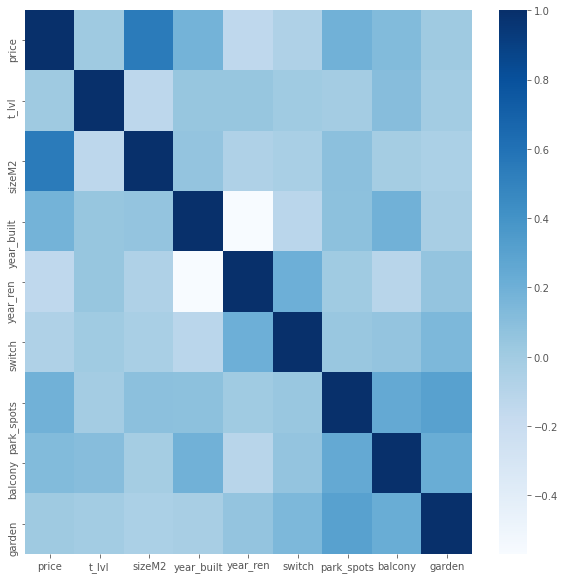

In [12]:
plt.figure(figsize =(10, 10))
data_corr = data_tfix[ind].drop(columns = cols_drop).corr()
sns.heatmap(data_corr,cmap = 'Blues')

## Selecting Features and Splitting

In [17]:
ind = (data_tfix['sizeM2']<300) & (data_tfix['sizeM2']>0) & (data_tfix['price']>0)&(data_tfix['ptype']==b'cumulative')&(data_tfix['year_built']>1800)
cols_drop = ['currency', 'AD_ID', 'posted_time', 'posted_date','shown', 'price/sizeM2', 'price/net_sizeM2', 'net_sizeM2', 'ptype']
data_tfix[ind].drop(columns = cols_drop).head(3)

,price,l_region,l_2,l_3,sits_in,lvl,t_lvl,flat_type,sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,192000,b'Savinjska',b'Celje',b'SlavkoSlander',b'V vecstanovanjski stavbi',b'1',2,b'3-sobno',86,2004,0,b'nan',b'None',0,0,0,0
1,134500,b'Osrednjeslovenska',b'LjubljanaCenter',b'Center',b'V vecstanovanjski stavbi',b'P',4,b'Garsonjera',28,1908,2020,b'Popolnoma opremljeno',b'EI',1,0,0,0
2,29500,b'Gorenjska',b'Trzic',b'Trzic',b'V vecstanovanjski stavbi',b'1',5,b'Garsonjera',11,1961,0,b'nan',b'E',0,0,0,0


In [18]:
train, test = train_test_split(data_tfix[ind].drop(columns = cols_drop), test_size=0.2, random_state = 42)

In [19]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 625 to 127
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   price       636 non-null    int64
 1   l_region    636 non-null    |S25 
 2   l_2         636 non-null    |S25 
 3   l_3         636 non-null    |S25 
 4   sits_in     636 non-null    |S24 
 5   lvl         636 non-null    |S9  
 6   t_lvl       636 non-null    int32
 7   flat_type   636 non-null    |S13 
 8   sizeM2      636 non-null    int32
 9   year_built  636 non-null    int32
 10  year_ren    636 non-null    int32
 11  condition   636 non-null    |S20 
 12  en_eff      636 non-null    |S7  
 13  switch      636 non-null    int32
 14  park_spots  636 non-null    int32
 15  balcony     636 non-null    int32
 16  garden      636 non-null    int32
dtypes: bytes104(1), bytes160(1), bytes192(1), bytes200(3), bytes56(1), bytes72(1), int32(8), int64(1)
memory usage: 121.7 KB
<class 'pandas.core.frame.

In [67]:
cols_list = ['price','shown', 'sizeM2', 'net_sizeM2', 'year_built', 'year_ren','t_lvl', 'park_spots']
num_feats=data_tfix[ind][cols_list]
num_feats.shape

(795, 8)

<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

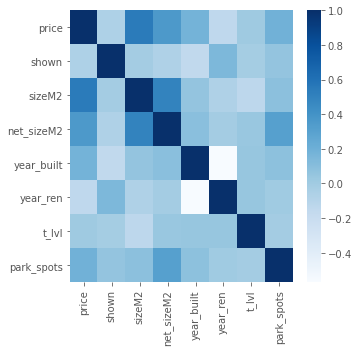

In [69]:
cols_list = ['price','shown', 'sizeM2', 'net_sizeM2', 'year_built', 'year_ren','t_lvl', 'park_spots']
num_feats=data_tfix[ind][cols_list]
num_feats.shape
plt.figure(figsize =(5, 5))
data_corr = num_feats.corr()
sns.heatmap(data_corr,cmap = 'Blues')


(795, 3)

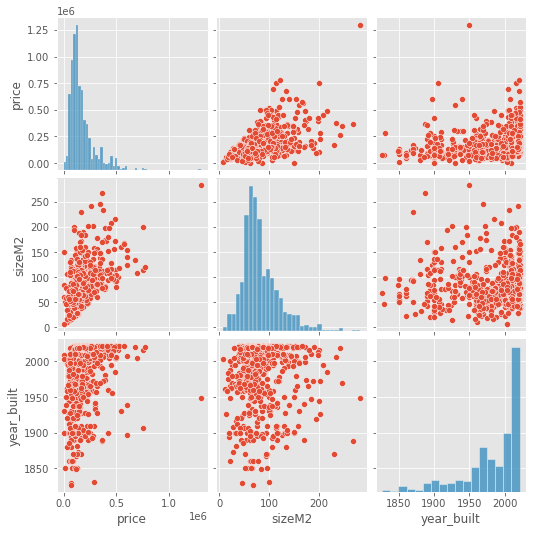

In [73]:
cols_list = ['price', 'sizeM2', 'year_built']
num_feats=data_tfix[ind][cols_list]
num_feats.shape
sns.pairplot(num_feats)

In [20]:
def impute_cats(df):
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers
    label_enc = LabelEncoder()
    encoders = {}
    
    
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])
        encoders[i] = label_enc
    return df

In [21]:
# Impute the missing values
train_imp = impute_cats(train)
test_imp = impute_cats(test)

In [22]:
X_train = train_imp.drop('price', axis =1)
y_train = np.ravel(np.array(train_imp[['price']]))
X_test = test_imp.drop('price', axis =1)
y_test = np.ravel(np.array(test_imp[['price']]))

<AxesSubplot:>

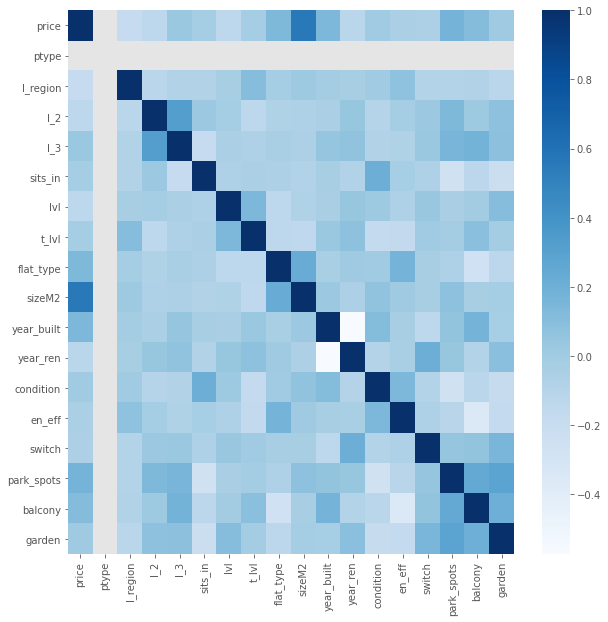

In [17]:
plt.figure(figsize =(10, 10))
data_corr = train.corr()
sns.heatmap(data_corr,cmap = 'Blues')

KeyError: 'net_sizeM2'

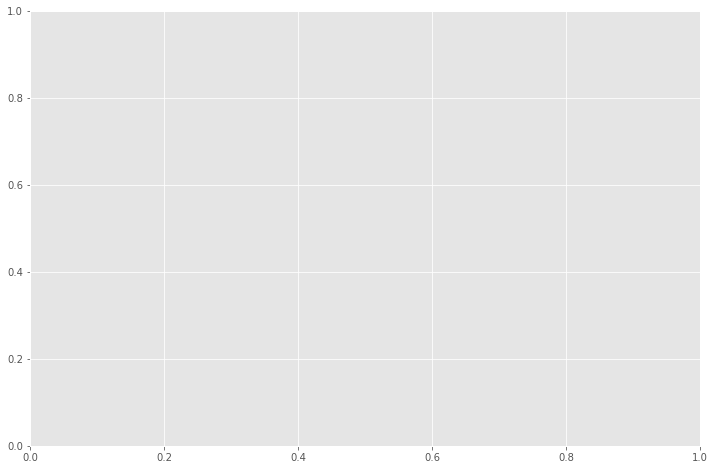

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x='net_sizeM2', y='price', color='green',data=train[(train['net_sizeM2']>0)&(train['net_sizeM2']<400)])


<AxesSubplot:xlabel='sizeM2', ylabel='price'>

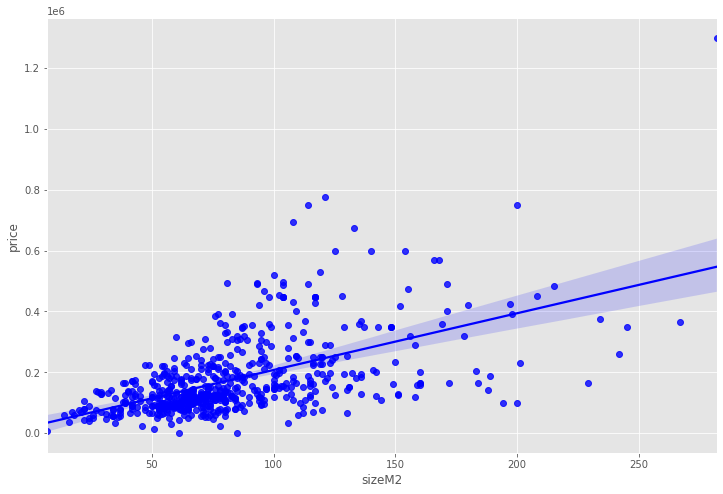

In [74]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x='sizeM2', y='price', color='blue',data=train_imp)

<AxesSubplot:xlabel='year_built', ylabel='price'>

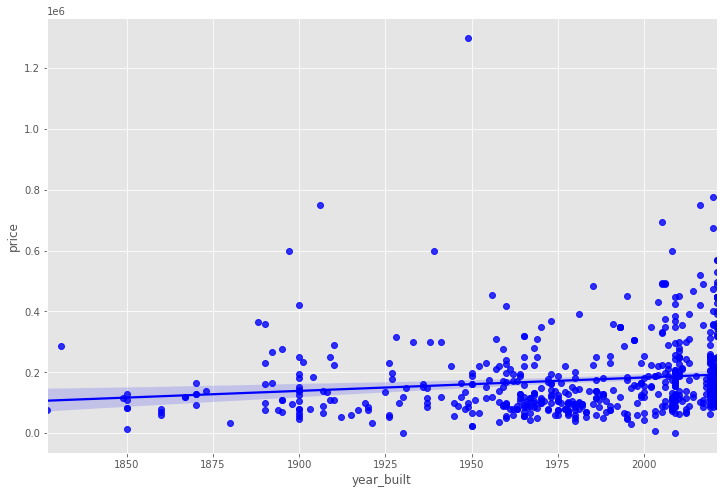

In [63]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x='year_built', y='price', color='blue',data=train_imp)

<AxesSubplot:xlabel='year_ren', ylabel='price'>

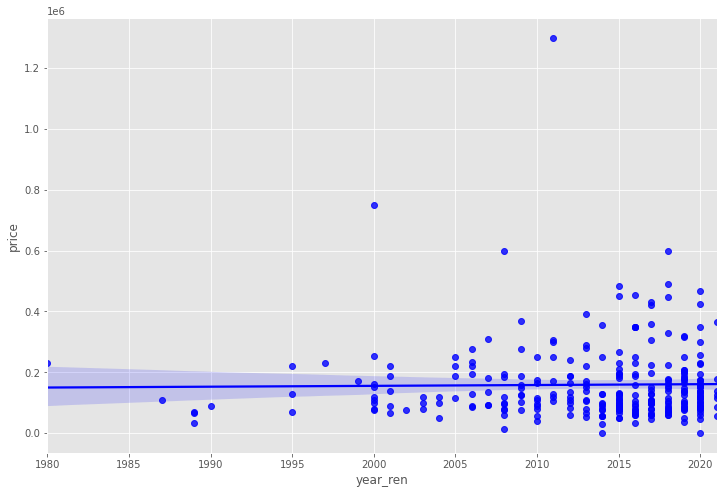

In [68]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x='year_ren', y='price', color='blue',data=train_imp[train_imp['year_ren']>1800])

<AxesSubplot:xlabel='year_built', ylabel='price'>

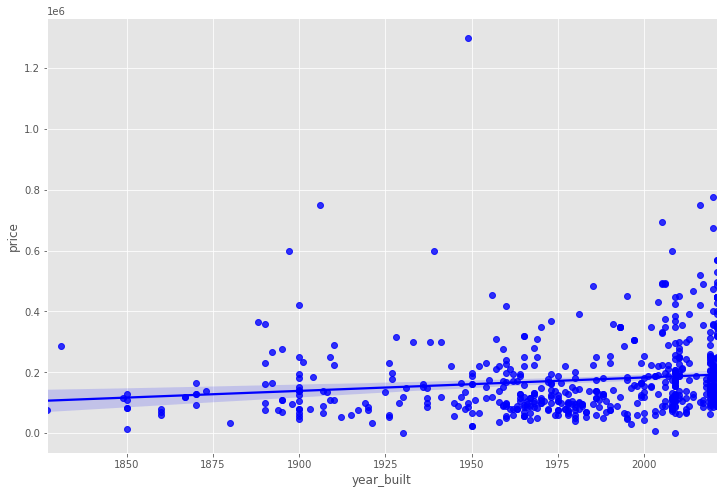

In [123]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x='year_built', y='price', color='blue',data=train)

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x='year_built', y='price', color='blue',data=train)

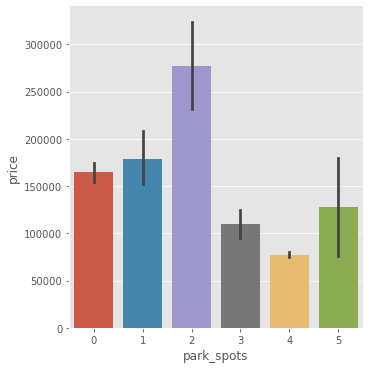

In [52]:
sns.catplot(x='park_spots', y='price', data=train, kind='bar')


In [25]:
print(train_imp.columns)

Index(['shown', 'price', 'ptype', 'l_region', 'l_2', 'l_3', 'sits_in', 'lvl',
       't_lvl', 'flat_type', 'sizeM2', 'net_sizeM2', 'price/sizeM2',
       'price/net_sizeM2', 'year_built', 'year_ren', 'condition', 'en_eff',
       'switch', 'park_spots', 'balcony', 'garden'],
      dtype='object')


<ipython-input-25-36dd9c9d13e8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pairplot(train_imp[ind][['price', 'sizeM2', 'year_built', 'l_2']])


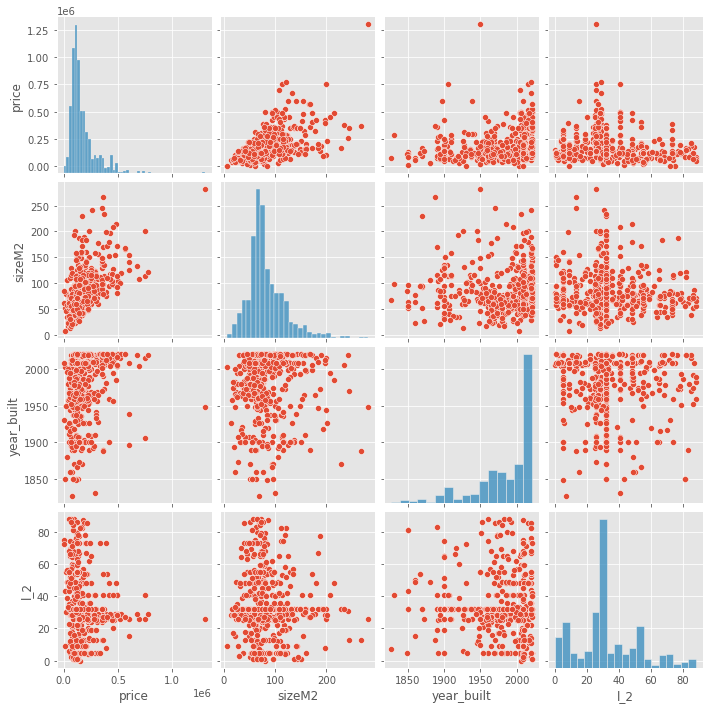

In [25]:
sns.pairplot(train_imp[ind][['price', 'sizeM2', 'year_built', 'l_2']])

In [171]:
ind = (train_imp['sizeM2']<np.percentile(train_imp['sizeM2'], 98)) #& (train_imp['sizeM2']>np.percentile(train_imp['sizeM2'], 5))

In [164]:
train_imp[ind]

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
61,3627520,70,109,29203,195000,0,0,7,50,126,...,1950,0,2010,2020,3,18,0,1,1,1
351,6385959,141,17,64,244900,0,0,7,50,195,...,0,0,2020,0,5,3,0,2,0,0
350,6385960,141,17,72,198110,0,0,7,50,195,...,0,0,2020,0,5,3,0,2,0,0
953,4883597,149,157,420,200000,0,0,6,42,189,...,3076,0,0,0,5,18,0,0,1,0
66,6503941,70,91,13,119581,0,0,8,1,1,...,1553,0,2021,0,5,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,6485359,55,11,20,120444,0,0,8,1,1,...,1672,1672,2021,0,5,18,0,0,0,0
1075,4169221,131,139,456,450000,0,0,6,42,189,...,0,3169,1500,2019,1,12,0,0,1,0
1126,4155040,97,270,204,349397,0,0,6,43,102,...,0,3797,2021,0,5,12,0,0,1,0
891,4863991,138,314,339,246038,0,0,11,6,18,...,2321,2196,2019,0,2,3,0,0,0,0


In [73]:
train_imp.sort_values(by= 'price', ascending =False)['sizeM2'][:10]

688     282
919     121
290     200
689     114
638     108
926     133
130     154
978     140
96      125
1032    166
Name: sizeM2, dtype: int32

919     121
290     200
638     108
926     133
96      125
978     140
130     154
1032    166
864     168
720     159
Name: sizeM2, dtype: int32

In [19]:
from sklearn.metrics import confusion_matrix, mean_squared_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import shap

Preparing for the modelling: 
    preparing the measurement metric

In [27]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

In [28]:
np.set_printoptions(precision=4)

## Random Forest

In [103]:
rf_model = RandomForestRegressor(n_estimators=300,
                                      max_depth=10,
                                      #min_samples_split=5,
                                      #min_samples_leaf=5,
                                      max_features=None,
                                      random_state=42,
                                      oob_score=True
                                     )
kf = KFold(n_splits=5)
y_pred = cross_val_score(rf_model, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.6734859198276999

In [104]:
y_pred

array([0.6892, 0.7498, 0.7451, 0.5804, 0.603 ])

In [105]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=None, n_estimators=300,
                      oob_score=True, random_state=42)

In [106]:
y_train_pred_rf = rf_model.predict(X_train)

In [107]:
rmse(y_train, y_train_pred_rf)

0.31931898762969635

In [108]:
y_test_pred_rf = rf_model.predict(X_test)
rmse(y_test, y_test_pred_rf)

0.8995931307213328

In [55]:
X_train.shape

(636, 16)

<BarContainer object of 16 artists>

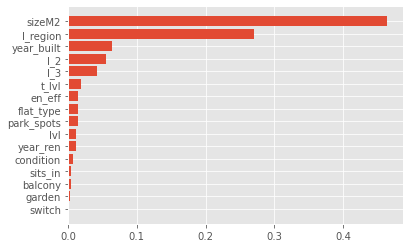

In [101]:
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), rf_model.feature_importances_[sorted_idx])

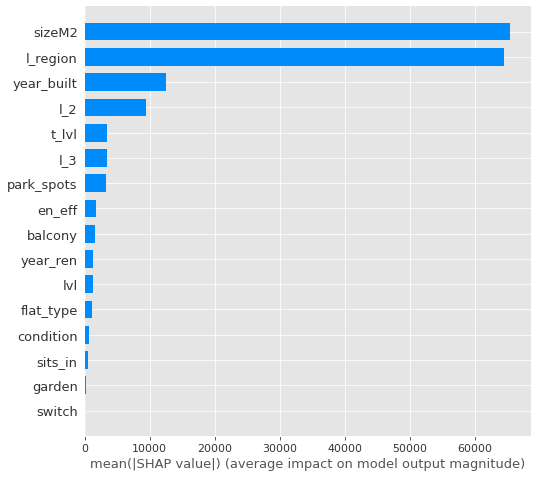

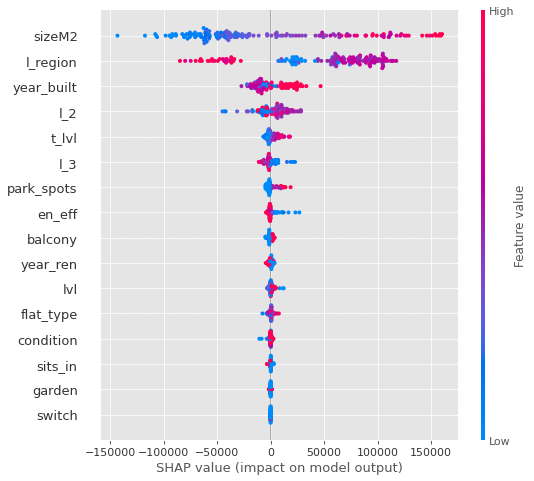

In [102]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

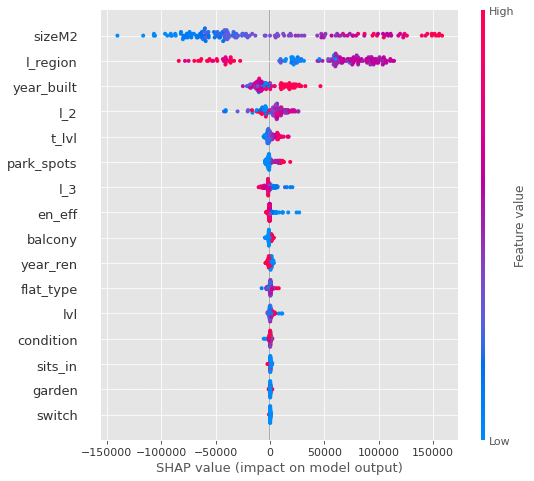

In [48]:
shap.summary_plot(shap_values, X_test)

## XGBoost


In [29]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [138]:
xgboost_model = XGBRegressor(learning_rate=0.01,
                         n_estimators=2000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7,
                         colsample_bytree=0.2,
                         nthread=-1,
                         scale_pos_weight=1, seed=27,
                         reg_alpha=0.00006
                       )

kf = KFold(n_splits=5)
y_pred = cross_val_score(xgboost_model, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.7362395446890068

In [139]:
y_pred

array([0.8052, 0.7556, 0.7799, 0.5735, 0.767 ])

In [140]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, nthread=-1, num_parallel_tree=1,
             random_state=27, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [141]:
y_test.shape
y_test_pred_xgboost = xgboost_model.predict(X_test)

(159,)

In [142]:
rmse(y_test, y_test_pred_xgboost)

0.8321610580809972

<BarContainer object of 16 artists>

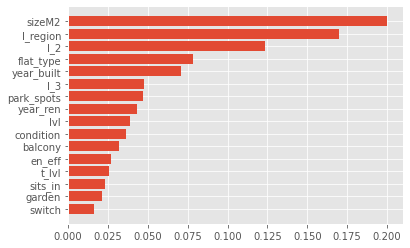

In [143]:
sorted_idx = xgboost_model.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), xgboost_model.feature_importances_[sorted_idx])

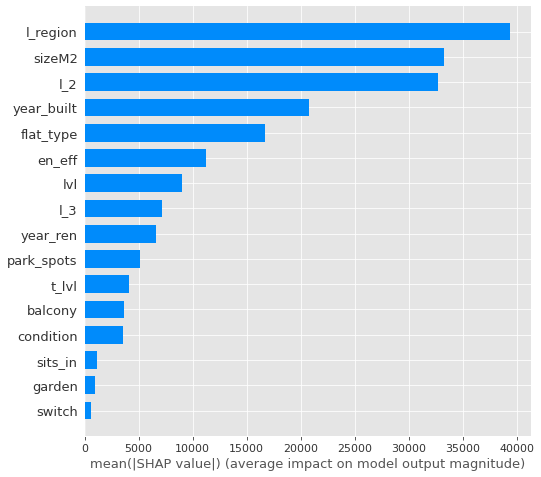

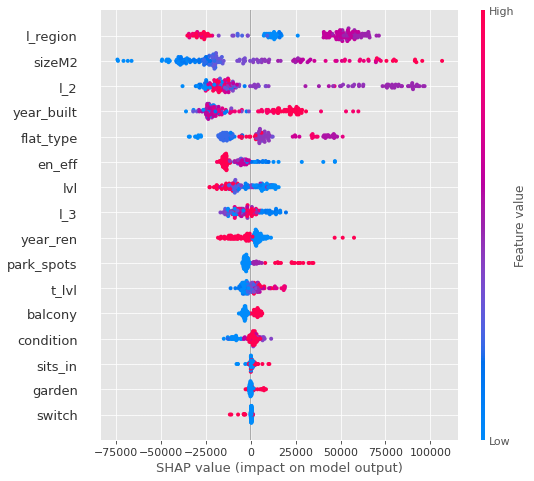

In [144]:
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

## Gradient boost Regressor GBM

In [145]:
g_boost_model = GradientBoostingRegressor( n_estimators=200, learning_rate=0.01,
                                     max_depth=5, max_features='sqrt',
                                     #min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42
                                   )


kf = KFold(n_splits=5)
y_pred = cross_val_score(g_boost_model, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.6658026896904283

In [146]:
y_pred

array([0.699 , 0.6916, 0.6901, 0.5451, 0.7032])

In [147]:
g_boost_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          n_estimators=200, random_state=42)

In [148]:
y_test_pred_g_boost = g_boost_model.predict(X_test)

In [149]:
rmse(y_test, y_test_pred_g_boost)

0.8235473638411391

In [150]:
np.set_printoptions(precision=3)

In [43]:
# shows pred and real values
np.array(list(zip(y_test,y_test_pred_g_boost)))
# change how numpy displays values!!!
np.set_printoptions(precision=1)


array([[1.490e+05, 1.731e+05],
       [7.500e+04, 1.528e+05],
       [9.900e+04, 1.759e+05],
       [2.980e+05, 2.855e+05],
       [1.800e+02, 3.322e+05],
       [1.790e+05, 1.969e+05],
       [9.000e+04, 2.001e+05],
       [5.300e+04, 8.271e+04],
       [9.400e+04, 1.584e+05],
       [1.399e+05, 2.671e+05],
       [7.118e+04, 1.326e+05],
       [1.520e+05, 1.389e+05],
       [8.000e+04, 1.702e+05],
       [9.000e+04, 1.043e+05],
       [2.300e+05, 1.611e+05],
       [1.700e+05, 2.947e+05],
       [2.180e+05, 1.928e+05],
       [1.530e+05, 3.031e+05],
       [5.800e+04, 1.120e+05],
       [2.650e+05, 2.655e+05],
       [1.215e+05, 2.256e+05],
       [4.950e+05, 2.957e+05],
       [1.750e+05, 1.646e+05],
       [1.370e+05, 1.465e+05],
       [2.575e+05, 2.220e+05],
       [1.200e+05, 1.496e+05],
       [3.920e+05, 3.100e+05],
       [1.750e+05, 3.036e+05],
       [4.990e+04, 1.128e+05],
       [6.000e+04, 1.393e+05],
       [6.690e+04, 1.558e+05],
       [1.200e+05, 1.784e+05],
       [

<BarContainer object of 17 artists>

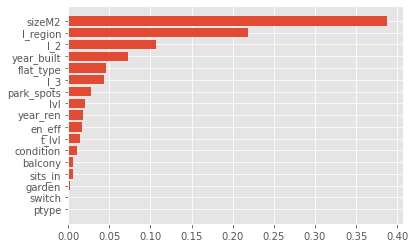

In [44]:
sorted_idx = g_boost_model.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), g_boost_model.feature_importances_[sorted_idx])

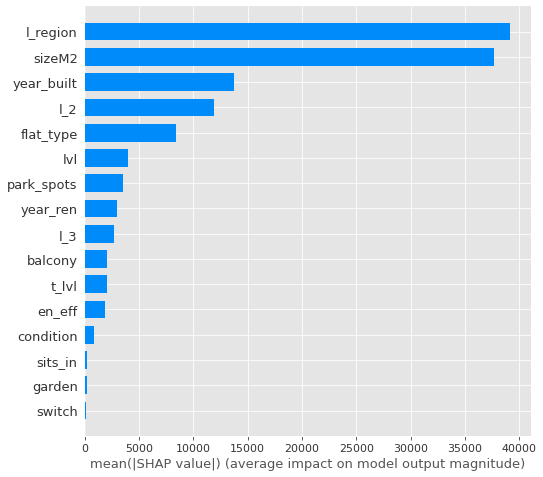

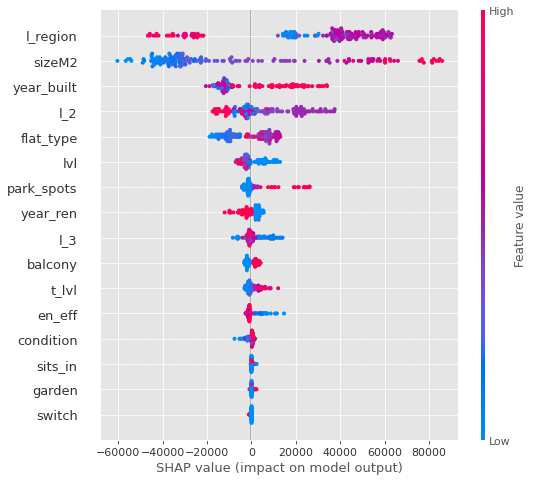

In [152]:
explainer = shap.TreeExplainer(g_boost_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

## Light GBM

In [155]:
lightgbm_model = LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       verbose=-1,
                                       bagging_fraction=0.80,
                                       bagging_freq=4, 
                                       bagging_seed=6,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                    )

kf = KFold(n_splits=5)
y_pred = cross_val_score(lightgbm_model, X_train, y_train, cv=kf)
y_pred.mean()

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 

0.7369998030509246

In [156]:
lightgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=6,
              feature_fraction=0.2, feature_fraction_seed=7, learning_rate=0.01,
              n_estimators=5000, num_leaves=6, objective='regression',
              verbose=-1)

In [157]:
y_test_pred_lightgbm = lightgbm_model.predict(X_test)

In [158]:
rmse(y_test, y_test_pred_lightgbm)

0.8395510969651879

<BarContainer object of 16 artists>

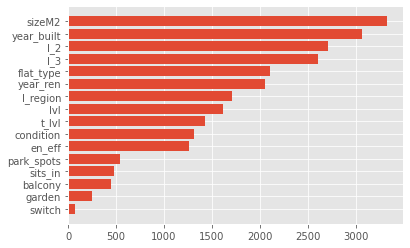

In [159]:
sorted_idx = lightgbm_model.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), lightgbm_model.feature_importances_[sorted_idx])

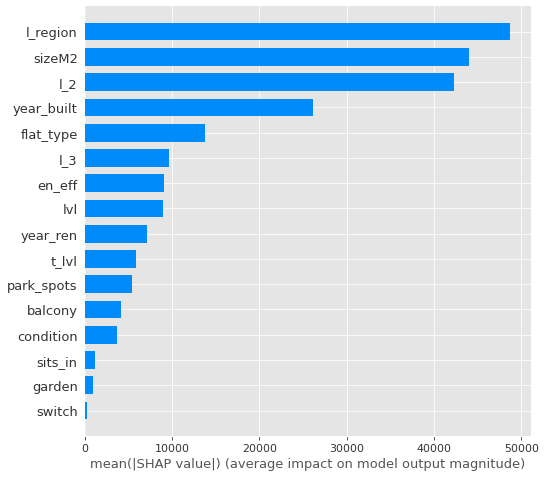

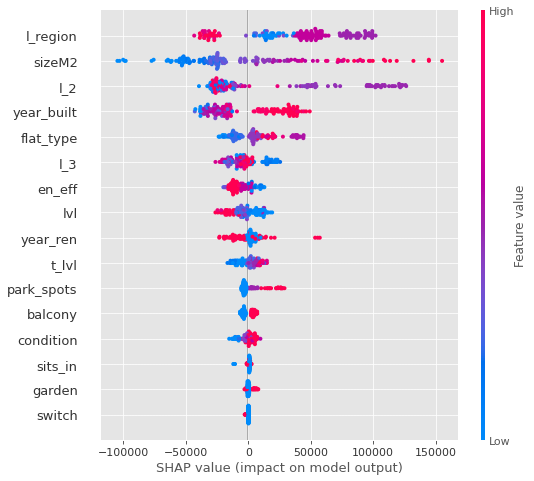

In [160]:
explainer = shap.TreeExplainer(lightgbm_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

## Multivariate Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:

lr_model = LinearRegression()
kf = KFold(n_splits=5)
y_pred = cross_val_score(lr_model, X_train, y_train, cv=kf)
y_pred.mean()


0.3820614251962201

In [59]:
y_pred

array([0.3573, 0.3732, 0.3049, 0.4112, 0.4638])

In [55]:
lr_model.fit(X_train, y_train)
y_test_pred_lr = lr_model.predict(X_test)

LinearRegression()

In [56]:
rmse(y_test, y_test_pred_lr)

0.8042935466915329

In [58]:
np.set_printoptions(precision=4)

In [60]:
sorted_idx = lr_model.feature_importances_.argsort()
plt.barh(list(X_test.columns[sorted_idx]), lr_model.feature_importances_[sorted_idx])

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

## Feature selection 

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [74]:
X_train.shape
X_train_new = SelectKBest(mutual_info_regression, k=5).fit_transform(X_train, y_train)
X_train_new

(636, 17)

array([[  79,  107,    3,   80, 1951],
       [   0,    0,   13,   81, 2006],
       [  55,    6,    3,   54, 2020],
       ...,
       [  32,   48,    3,   59, 1967],
       [  55,    6,    5,   71, 2020],
       [   1,    1,    5,   72, 2021]], dtype=int64)

In [73]:
X_train_new.shape

(636, 5)

In [80]:
from sklearn.feature_selection import SequentialFeatureSelector


ImportError: cannot import name 'SequentialFeatureSelector' from 'sklearn.feature_selection' (C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\__init__.py)

In [81]:
from sklearn.feature_selection import SelectFromModel

In [123]:
import shap

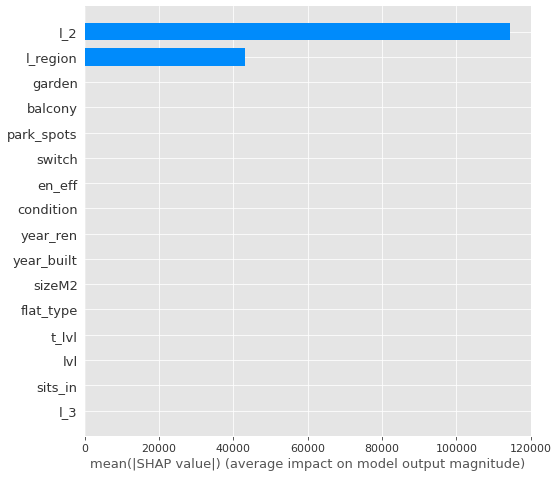

In [125]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [2]:
# Package for stacking models
from vecstack import stacking

ModuleNotFoundError: No module named 'vecstack'